In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Fertilizer Prediction.csv")
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [ ]:
df.shape

(99, 9)

In [ ]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [ ]:
df.rename(columns = {'Soil Type': 'Soil_Type', 'Crop Type': 'Crop_Type','Fertilizer Name':'Fertilizer_Name'}, inplace=True)

In [ ]:
df['Fertilizer_Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [ ]:
df['Soil_Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [ ]:
df['Crop_Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [ ]:
df.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil_Type          object
Crop_Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer_Name    object
dtype: object

In [ ]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [ ]:
print("Number of labels: {}".format(df['Fertilizer_Name'].nunique()))
df['Fertilizer_Name'].value_counts()

Number of labels: 7


Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer_Name, dtype: int64

In [ ]:
#check null values
df.isna().sum()

Temparature        0
Humidity           0
Moisture           0
Soil_Type          0
Crop_Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer_Name    0
dtype: int64

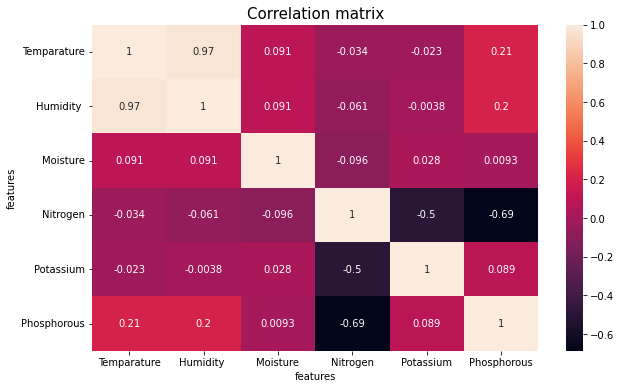

In [ ]:
#Correlation matrix
fig, ax = plt.subplots(1, 1,figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation matrix', fontsize = 15, c='black')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [ ]:
soil_type_label_encoder = LabelEncoder()
df["Soil_Type"] = soil_type_label_encoder.fit_transform(df["Soil_Type"])

In [ ]:
crop_type_label_encoder = LabelEncoder()
df["Crop_Type"] = crop_type_label_encoder.fit_transform(df["Crop_Type"])

In [ ]:
df.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer_Name
0,26,52,38,4,3,37,0,0,Urea
1,29,52,45,2,8,12,0,36,DAP
2,34,65,62,0,1,7,9,30,14-35-14
3,32,62,34,3,9,22,0,20,28-28
4,28,54,46,1,6,35,0,0,Urea


In [ ]:
croptype_dict = {}
for i in range(len(df["Crop_Type"].unique())):
    croptype_dict[i] = crop_type_label_encoder.inverse_transform([i])[0]
print(croptype_dict)

soiltype_dict = {}
for i in range(len(df["Soil_Type"].unique())):
    soiltype_dict[i] = soil_type_label_encoder.inverse_transform([i])[0]
print(soiltype_dict)

{0: 'Barley', 1: 'Cotton', 2: 'Ground Nuts', 3: 'Maize', 4: 'Millets', 5: 'Oil seeds', 6: 'Paddy', 7: 'Pulses', 8: 'Sugarcane', 9: 'Tobacco', 10: 'Wheat'}
{0: 'Black', 1: 'Clayey', 2: 'Loamy', 3: 'Red', 4: 'Sandy'}


In [ ]:
#fertname_label_encoder = LabelEncoder()
#df["Fertilizer Name"] = fertname_label_encoder.fit_transform(df["Fertilizer Name"])

In [ ]:
'''fertname_dict = {}
for i in range(len(df["Fertilizer Name"].unique())):
    fertname_dict[i] = fertname_label_encoder.inverse_transform([i])[0]
print(fertname_dict)'''

'fertname_dict = {}\nfor i in range(len(df["Fertilizer Name"].unique())):\n    fertname_dict[i] = fertname_label_encoder.inverse_transform([i])[0]\nprint(fertname_dict)'

In [ ]:
y = df['Fertilizer_Name']
X = df.drop('Fertilizer_Name', axis=1)

In [ ]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [ ]:
X_train.shape,Y_train.shape

((79, 8), (79,))

In [ ]:
X_test.shape,Y_test.shape

((20, 8), (20,))

In [ ]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=0)
RF.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

In [ ]:
Y_pred = RF.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("RF's Accuracy is: ", accuracy)

RF's Accuracy is:  0.95


In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

    10-26-26       0.50      1.00      0.67         1
    14-35-14       1.00      0.67      0.80         3
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         3
         DAP       1.00      1.00      1.00         4
        Urea       1.00      1.00      1.00         7

    accuracy                           0.95        20
   macro avg       0.93      0.95      0.92        20
weighted avg       0.97      0.95      0.95        20



In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
# build the KNN model
from sklearn.neighbors import KNeighborsClassifier
kn_classifier = KNeighborsClassifier(n_neighbors=4,metric='euclidean')
kn_classifier.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [ ]:
# make predictions on test set
kn_pred=kn_classifier.predict(X_test)

In [ ]:
accuracy_score(Y_test,kn_pred)

0.9

In [ ]:
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask,jsonify
app=Flask(__name__)
run_with_ngrok(app)
@app.route("/<int:Temperature>/<int:Humidity>/<int:Moisture>/<int:Soil_Type>/<int:Crop_Type>/<int:Nitrogen>/<int:Potassium>/<int:Phosphorous>")
def home(Temperature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous):
  b=[]
  b+=[Temperature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous]
  arr=np.array([b])
  predict=RF.predict(arr)
  if predict == ["Urea"]:
    result={'result':'Urea'}
  elif predict== ["DAP"]:
    result={'result':'DAP'}
  elif predict== ["28-28"]:
    result={'result':'28-28'}
  elif predict== ["14-35-14"]:
    result={'result':'14-35-14'}
  elif predict== ["20-20"]:
    result={'result':'20-20'}
  elif predict== ["17-17-17"]:
    result={'result':'17-17-17'}
  elif predict== ["10-26-26"]:
    result={'result':'10-26-26'}

  return result
app.run()



 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://8072-35-240-162-33.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
